<a href="https://colab.research.google.com/github/GiulioAppetito/Progetto-PMCSN/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

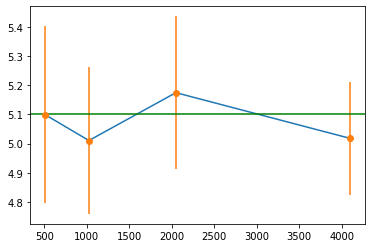

In [96]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

intervals = []
sample_means = []
x = []
y = []

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputWaitCinema.csv'
df1 = pd.read_csv(url)
df1 = df1[df1['k']==256]

for i in df1.index:
  intervals.append(df1.loc[i,"interval"])
  sample_means.append(df1.loc[i,"wait"])
  x.append(df1.loc[i,"b"])
intervals

# importing matplotlib
import matplotlib.pyplot as plt
 
 
# making a simple plot
y =sample_means
 
# creating error
y_error = intervals
 
# plotting graph
plt.plot(x, y)
 
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')
plt.axhline(y=5.1, color='g', linestyle='-')

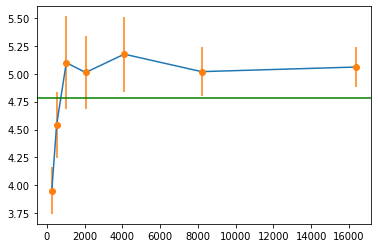

In [94]:
intervals = []
sample_means = []
x = []
y = []

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputWaitCinema.csv'
df1 = pd.read_csv(url)
df1 = df1[df1['k']==128]

for i in df1.index:
  intervals.append(df1.loc[i,"interval"])
  sample_means.append(df1.loc[i,"wait"])
  x.append(df1.loc[i,"b"])
intervals

# importing matplotlib
import matplotlib.pyplot as plt
 
 
# making a simple plot
y =sample_means
 
# creating error
y_error = intervals
 
# plotting graph
plt.plot(x, y)
 
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')
plt.axhline(y=4.78, color='g', linestyle='-')

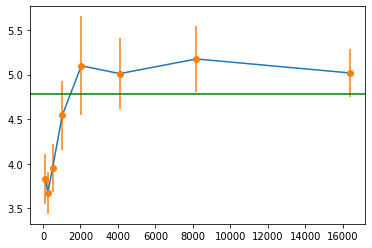

In [93]:
intervals = []
sample_means = []
x = []
y = []

url = 'https://raw.githubusercontent.com/GiulioAppetito/Progetto-PMCSN/main/outputWaitCinema.csv'
df1 = pd.read_csv(url)
df1 = df1[df1['k']==64]

for i in df1.index:
  intervals.append(df1.loc[i,"interval"])
  sample_means.append(df1.loc[i,"wait"])
  x.append(df1.loc[i,"b"])
intervals

# importing matplotlib
import matplotlib.pyplot as plt
 
 
# making a simple plot
y =sample_means
 
# creating error
y_error = intervals
 
# plotting graph
plt.plot(x, y)
 
plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')
plt.axhline(y=4.78, color='g', linestyle='-')